In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [18]:
data = pd.read_csv('../Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
ks = list(range(2, 11))
silhouettes = []
inertias = []

In [22]:
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil = silhouette_score(X_scaled, labels)
    silhouettes.append(sil)

print("len(ks) =", len(ks))
print("len(inertias) =", len(inertias))
print("len(silhouettes) =", len(silhouettes))

len(ks) = 9
len(inertias) = 9
len(silhouettes) = 9


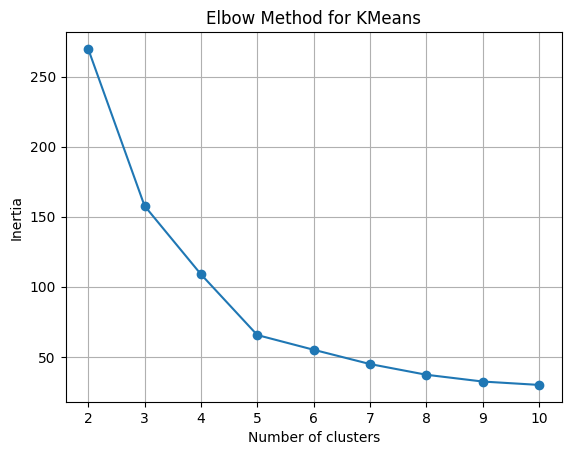

In [23]:
# plot elbow
plt.plot(ks, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')
plt.grid(True)
plt.show()

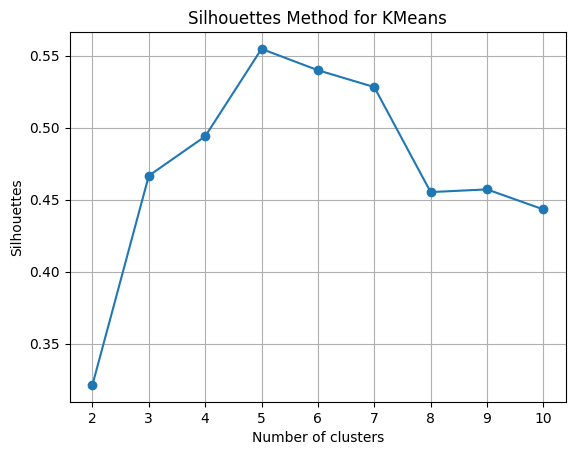

In [24]:
# plot silhouette
plt.plot(ks, silhouettes, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouettes')
plt.title('Silhouettes Method for KMeans')
plt.grid(True)
plt.show()

In [27]:
# best k

best_k = ks[int(np.argmax(silhouettes))]
best_k

5

In [29]:
final_cls = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = final_cls.fit_predict(X_scaled)
data['Clusters'] = labels

In [30]:
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(X_scaled)

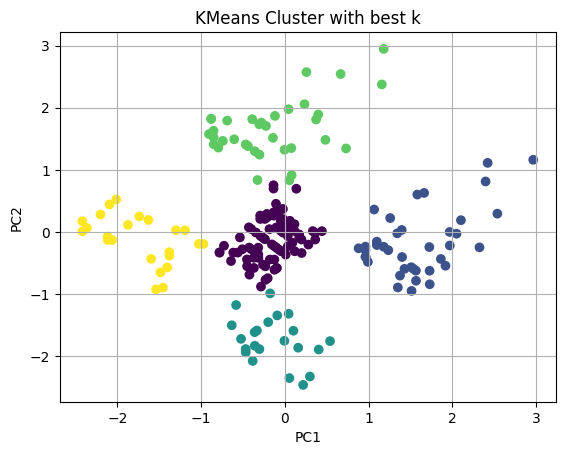

In [31]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Cluster with best k')
plt.grid(True)
plt.show()